In [ ]:
#OBSERVATIONS

#1) While it isn't a "magic pill", Capomulin appears to be a promising method of treatment, offering negative tumor growth, reduced spread of cancer, and increased odds of survival over the treatment period. 
#2) Infubinol seems to reduce the spread of the cancer (metastatic sites) but at the cost of increased mortality; we might infer the medication is toxic in and of itself. 
#3) Ketapril has no measurable effect on cancer volume, cancer spread, or mortality, with comparable outcomes and all standard errors overlapping. 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from cycler import cycler

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mice_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(mice_df, clinical_df, on = "Mouse ID")

#Record the targeted medications
meds = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Display the data table for preview

combined_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

response_tv = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

response_tvdf = pd.DataFrame(response_tv)

# Preview DataFrame

response_tvdf.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

response_tvse = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

response_tvsedf = pd.DataFrame(response_tvse)
               
# Preview DataFrame
 
response_tvsedf.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

res_tvdf2 = response_tvdf.reset_index()
res_tvdf2 = res_tvdf2.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
res_tvse2 = response_tvsedf.reset_index()
res_tvse2 = res_tvse2.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

# Preview that Reformatting worked

#prints the means
res_tvdf2.head(12)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#prints the standard errors
res_tvse2.head(12)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
#

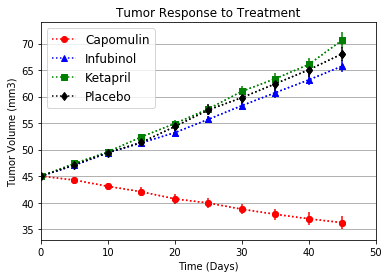

In [95]:
# Generate the Plot (with Error Bars)

#https://matplotlib.org/3.1.1/tutorials/intermediate/color_cycle.html
#https://stackoverflow.com/questions/7799156/can-i-cycle-through-line-styles-in-matplotlib

default_cycler = (
    cycler(color = ["red", "blue", "green", "black"]) + 
    cycler(linestyle = [":", ":", ":", ":"]) +
    cycler(marker = ["o", "^", "s", "d"])
)

fig, ax = plt.subplots()

x_axis = x_axis = np.arange(0, 46, 5)


for med in meds:
    plt.rc('axes', prop_cycle=default_cycler)
    plt.plot(res_tvdf2[med])

for med in meds:
    ax.errorbar(x_axis, res_tvdf2[med], res_tvse2[med])
    
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(meds, loc = "upper left", fontsize = "large")

h_lines = np.arange(0, 100, 5)
plt.hlines(h_lines, 0, 60, lw = 1, alpha=0.3)

plt.xlim(0, 50)
plt.ylim(33,74)

# # Save the Figure

plt.savefig("tumor_response_to_treatment.png")

# # Show the Figure

plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

response_ms = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame

response_msdf = pd.DataFrame(response_ms)

# Preview DataFrame

response_msdf.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
response_msse = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
response_mssedf = pd.DataFrame(response_msse)
               
# Preview DataFrame
 
response_mssedf.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames

res_msdf2 = response_msdf.reset_index()
res_msdf2 = res_msdf2.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
res_msse2 = response_mssedf.reset_index()
res_msse2 = res_msse2.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")


# Preview that Reformatting worked

#means

res_msdf2.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
#standard errors

res_msse2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


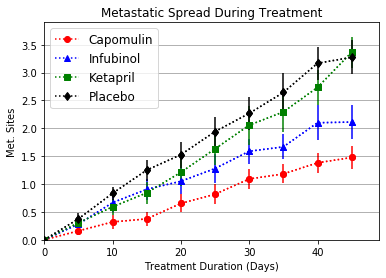

In [94]:
# Generate the Plot (with Error Bars)

#fig, ax = plt.subplots()

default_cycler = (
    cycler(color = ["red", "blue", "green", "black"]) + 
    cycler(linestyle = [":", ":", ":", ":"]) +
    cycler(marker = ["o", "^", "s", "d"])
)

fig, ax = plt.subplots()

for med in meds:
    plt.rc('axes', prop_cycle=default_cycler)
    plt.plot(res_msdf2[med])

    
for med in meds:
    ax.errorbar(x_axis, res_msdf2[med], res_msse2[med])


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend(meds, loc = "upper left", fontsize = "large")

h_lines = np.arange(0, 4, 0.5)
plt.hlines(h_lines, 0, 50, lw = 1, alpha=0.3)

plt.xlim(0, 49)
plt.ylim(0,3.9)

# Save the Figure

plt.savefig("metastatic_spread.png")

# Show the Figure

plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

response_mc = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame

response_mcdf = pd.DataFrame(response_mc)

# Preview DataFrame

response_mcdf.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
# Minor Data Munging to Re-Format the Data Frames

res_mcdf2 = response_mcdf.reset_index()
res_mcdf2 = res_mcdf2.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")


# Preview the Data Frame

res_mcdf2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


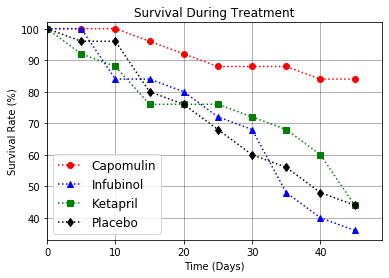

In [15]:
# Generate the Plot (Accounting for percentages)
default_cycler = (
    cycler(color = ["red", "blue", "green", "black"]) + 
    cycler(linestyle = [":", ":", ":", ":"]) +
    cycler(marker = ["o", "^", "s", "d"])
)


for med in meds:
    plt.rc('axes', prop_cycle=default_cycler)
    plt.plot((res_mcdf2[med]/res_mcdf2[med].max())*100)
    
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.legend(meds, loc = "lower left", fontsize = "large")

h_lines = np.arange(0, 100, 10)
plt.hlines(h_lines, 0, 50, lw = 1, alpha=0.3)
v_lines = np.arange(0, 50, 10)
plt.vlines(v_lines, 0, 110, lw = 1, alpha = 0.3)

plt.xlim(0, 49)
plt.ylim(33,102)
# Save the Figure

plt.savefig("survival_during_treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
##### Calculate the percent changes for each drug

medications = []
# row_list = []

for med in res_tvdf2:
    medications.append(med)

# percent_change = ((res_tvdf2 - 45) / 45)*100

# for rows in percent_change.iterrows():
#     last_row = rows

# # # Display the data to confirm

# last_row

    
percent_change = ((res_tvdf2.tail(1) - 45) / 45)*100
efficacy = percent_change.values
efficacy = efficacy[0]
# # Display the data to confirm

print(medications)
print (efficacy)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[-19.47530267  42.51649186  46.12347173  57.02879469  53.92334713
  51.29796048  47.24117486 -22.32090046  52.08513429  46.57975087]


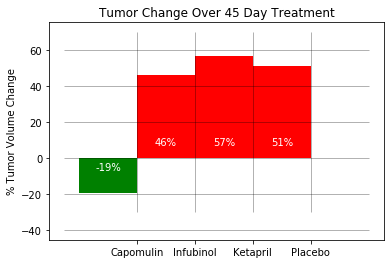

In [137]:
# Store all Relevant Percent Changes into a Tuple

merged_list = tuple(zip(medications, efficacy))

medlist = []

fig, ax = plt.subplots()

for med in meds: 
    for item in merged_list:
        if item[0] == med:
            medlist.append(item)

# Splice the data between passing and failing drugs

passing = []
failing = []

for thingy in medlist:
    if thingy[1] < 0:
        passing.append(thingy) 
    elif thingy[1] >= 0:
        failing.append(thingy)


# for thingy in passing:
#     bar_plot_p = plt.bar(thingy[0], thingy[1], width = -1, color = 'g', align = 'edge')
    
# for thingy in failing:     
#     bar_plot_f = plt.bar(thingy[0], thingy[1], width = -1, color = 'r', align = 'edge')

#https://stackoverflow.com/questions/6454894/reference-an-element-in-a-list-of-tuples
bar_plot_p = plt.bar([x[0] for x in passing], [x[1] for x in passing], width = -1, color = 'g', align = 'edge')
bar_plot_f = plt.bar([x[0] for x in failing], [x[1] for x in failing], width = -1, color = 'r', align = 'edge')
# Orient widths. Add labels, tick marks, etc. 

    
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")


h_lines = np.arange(-40, 80, 20)
plt.hlines(h_lines, -1.25, 4, lw = 1, alpha=0.3)
v_lines = np.arange(0, 4, 1)
plt.vlines(v_lines, -30, 70, lw = 1, alpha = 0.3)

# Use functions to label the percentages of changes
# #https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh

def autolabel_f(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 7, 
               f"{int(height)}%",
                ha = 'center', va = 'baseline', color = 'white')

def autolabel_p(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., -7, 
               f"{int(height)}%",
                ha = 'center', va = 'baseline', color = 'white')
        
# # # Call functions to implement the function calls

autolabel_p(bar_plot_p)
autolabel_f(bar_plot_f)


# Save the Figure

plt.savefig("Tumor_change_over_45_day_treatment.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/change.png)